# Sentiment Analysis

In [1]:
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 9.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=8c1d3854a8962be654ae42461f9cbb765c9799eea995a7f5b4741cbd3e9c2222
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 9.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-n

In [2]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string 
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
#Authentication
consumer_key = 'ZMMjkS37qTi9vuXsetoKbOGfP'
consumer_secret = 'eWdB2hAqm3hdkL3FhbKALAbtAViAEGAt7PIrIDXYGTBJcn44h8'
access_token = '1588836299200512000-spyB54fqpBesHUwDHOwRQWekIc33Se'
access_token_secret = '4OrK6v0GdVmzuyOWIlCN4FHbbfgRoU3E5soH9xIXhZpmO'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [4]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [5]:
def percentage(part,whole):
 return 100 * float(part)/float(whole)
 
keyword = input("Enter the hastag to look for: ")
noOfTweet = int(input ("How many tweets do you want to scrap? "))

tweets = tweepy.Cursor(api.search, q=keyword, lang="en", wait_on_rate_limit=True).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
 
  tweet_list.append(tweet.text)
  analysis = TextBlob(tweet.text)
  score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  polarity += analysis.sentiment.polarity
  
  if neg > pos:
    negative_list.append(tweet.text)
    negative += 1
  elif pos > neg:
    positive_list.append(tweet.text)
    positive += 1 
  elif pos == neg:
    neutral_list.append(tweet.text)
    neutral += 1
    
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Enter the hastag to look for: #Covid19
How many tweets do you want to scrap? 10000


In [6]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  10000
positive number:  4095
negative number:  3551
neutral number:  2354


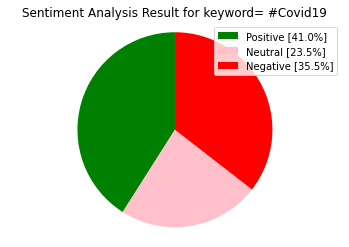

In [7]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['green', 'pink','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for keyword= '+keyword+'' )
plt.axis('equal')
plt.show()

In [8]:
tweet_list.drop_duplicates(inplace = True)

In [9]:
df = pd.DataFrame(tweet_list)
df["text"] = df[0]

remove_rt = lambda x: re.sub("RT @\w+: "," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
df["text"] = df.text.map(remove_rt).map(rt)
df["text"] = df.text.str.lower()
df.head(10)

,0,text
0,Translation; Research shows #COVID19 vaccine o...,translation research shows covid19 vaccine o...
1,Amarcord... #COVID19 #nessunacorrelazione http...,amarcord covid19 nessunacorrelazione
2,Today…15–11-2022 #sociologia #sociology #relig...,today 15 11 2022 sociologia sociology relig...
3,Covid-19 boosters could keep thousands of kids...,covid 19 boosters could keep thousands of kids...
4,RT @picardonhealth: Isn't protecting our child...,isn t protecting our children a good reason t...
5,SEPESIAL MOMENT MAXWIN BERSAMA ID PRO\nLINK h...,sepesial moment maxwin bersama id pro link ...
6,RT @SunitaReed: An elephant does a PSA about #...,an elephant does a psa about airborne vs dro...
7,New piece by myself on the contradictions betw...,new piece by myself on the contradictions betw...
8,"People blindly following ""the science"" now wou...",people blindly following the science now wou...
9,Leg Lamp It's a Major Award A Christmas Story ...,leg lamp it s a major award a christmas story ...


In [10]:
df[["polarity", "subjectivity"]] = df["text"].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in df["text"].iteritems():
  score = SentimentIntensityAnalyzer().polarity_scores(row)
  neg = score["neg"]
  neu = score["neu"]
  pos = score["pos"]
  comp = score["compound"]
  if neg > pos:
    df.loc[index, "sentiment"] = "negative"
  elif pos > neg:
    df.loc[index, "sentiment"] = "positive"
  else:
    df.loc[index, "sentiment"] = "neutral"
    df.loc[index, "neg"] = neg
    df.loc[index, "neu"] = neu
    df.loc[index, "pos"] = pos
    df.loc[index, "compound"] = comp

 

In [11]:
df.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Translation; Research shows #COVID19 vaccine o...,translation research shows covid19 vaccine o...,-0.029167,0.200000,negative,NaN,NaN,NaN,NaN
1,Amarcord... #COVID19 #nessunacorrelazione http...,amarcord covid19 nessunacorrelazione,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
2,Today…15–11-2022 #sociologia #sociology #relig...,today 15 11 2022 sociologia sociology relig...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
3,Covid-19 boosters could keep thousands of kids...,covid 19 boosters could keep thousands of kids...,0.000000,0.300000,negative,NaN,NaN,NaN,NaN
4,RT @picardonhealth: Isn't protecting our child...,isn t protecting our children a good reason t...,0.475000,0.466667,positive,NaN,NaN,NaN,NaN
5,SEPESIAL MOMENT MAXWIN BERSAMA ID PRO\nLINK h...,sepesial moment maxwin bersama id pro link ...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
6,RT @SunitaReed: An elephant does a PSA about #...,an elephant does a psa about airborne vs dro...,0.600000,0.800000,positive,NaN,NaN,NaN,NaN
7,New piece by myself on the contradictions betw...,new piece by myself on the contradictions betw...,0.268182,0.527273,negative,NaN,NaN,NaN,NaN
8,"People blindly following ""the science"" now wou...",people blindly following the science now wou...,0.000000,0.100000,neutral,0.0,1.0,0.0,0.0
9,Leg Lamp It's a Major Award A Christmas Story ...,leg lamp it s a major award a christmas story ...,0.062500,0.500000,positive,NaN,NaN,NaN,NaN


In [12]:
df_negative = df[df["sentiment"]=="negative"]
df_positive = df[df["sentiment"]=="positive"]
df_neutral = df[df["sentiment"]== "neutral"]

In [13]:
def count_values_in_column(data,feature):
  total=data.loc[:,feature].value_counts(dropna=False)
  percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
  return pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])

pc = count_values_in_column(df,"sentiment")

In [14]:
pc

,Total,Percentage
positive,1240,36.80
neutral,1164,34.54
negative,966,28.66


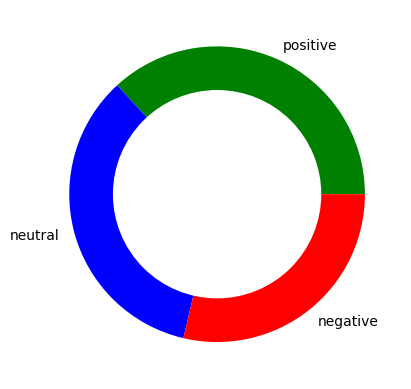

In [15]:
pichart = count_values_in_column(df,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [16]:
def remove_punctuation(text):
    #η συνάρτηση χωρίζει τις λέξεις σε γράμματα, αφαιρεί σημεία στίξης και συγκεντρώνει ξανά γράμματα ως λέξεις
    text_no_punc = "".join([c for c in text if c not in string.punctuation])
    return text_no_punc

## WordCloud For The Whole Dataset

In [17]:
df['clean_text'] = df['text'].apply(lambda x: remove_punctuation(x))

In [18]:
stop_words = set(STOPWORDS)
wordcloud = WordCloud(background_color='black', stopwords = stop_words,max_words = 500, max_font_size = 100, random_state = 42, width=800, height=400)

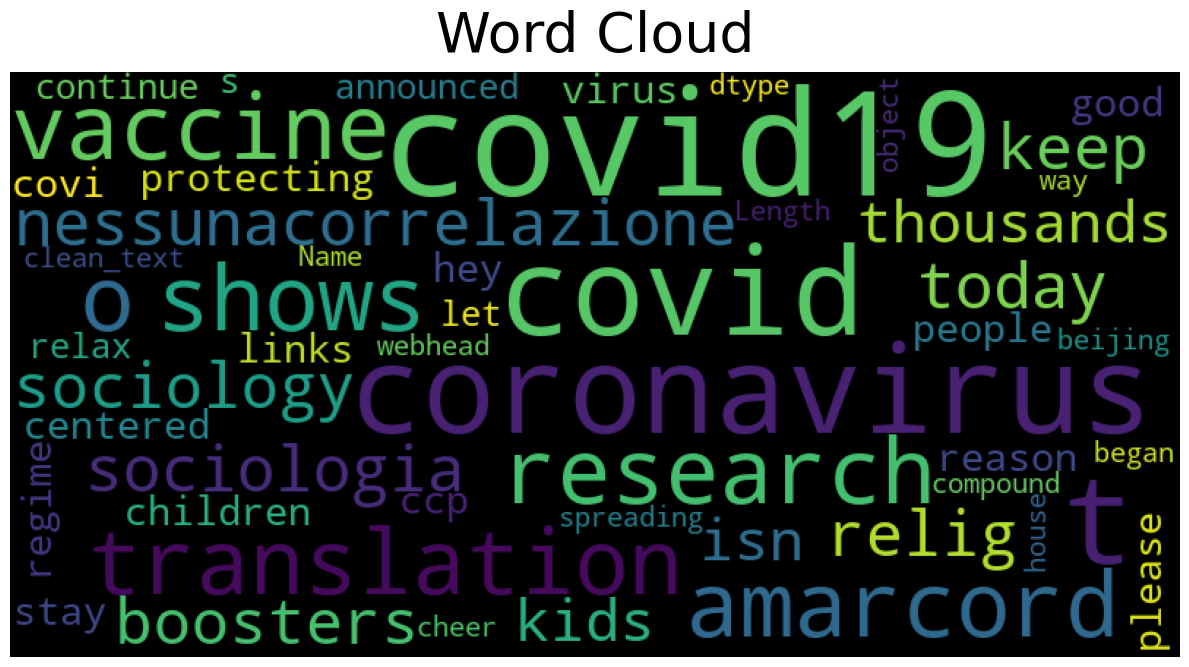

In [19]:
wordcloud.generate(str(df['clean_text']))
plt.figure(figsize=(12.0,8.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud", fontdict={'size': 40, 'color': 'black', 'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()  

## Wordcloud for the positive dataset

In [20]:
df_positive['clean_text'] = df_positive['text'].apply(lambda x: remove_punctuation(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
stop_words = set(STOPWORDS)
wordcloud = WordCloud(background_color='black', stopwords = stop_words,max_words = 500, max_font_size = 100, random_state = 42, width=800, height=400)

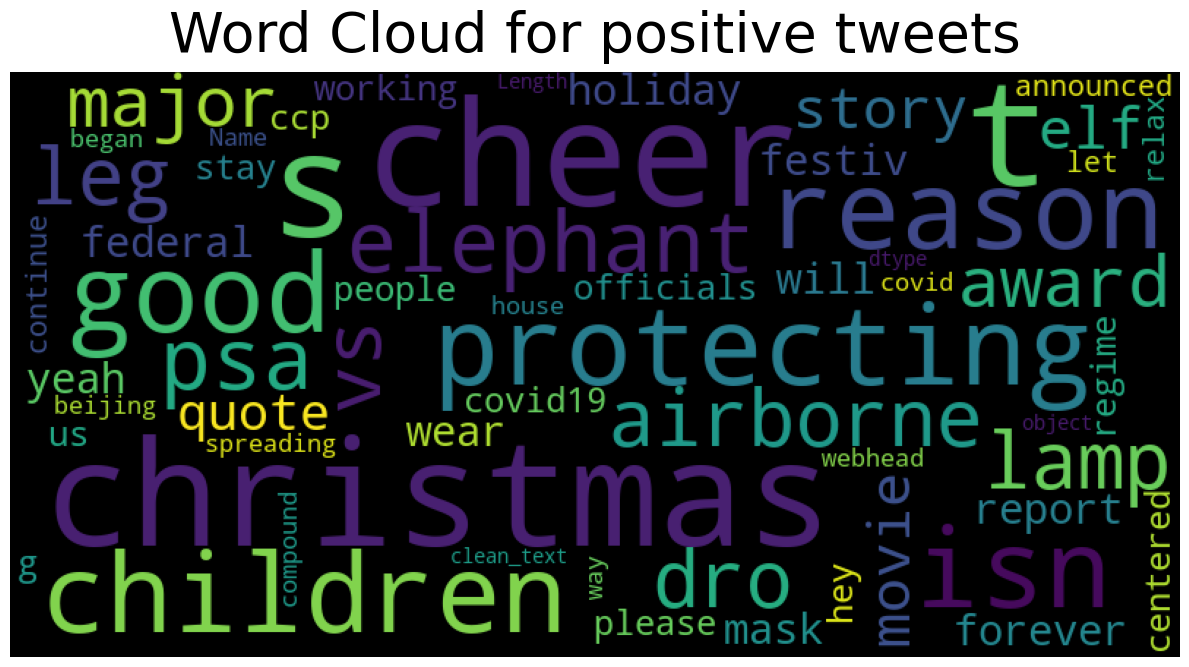

In [22]:
wordcloud.generate(str(df_positive['clean_text']))
plt.figure(figsize=(12.0,8.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud for positive tweets", fontdict={'size': 40, 'color': 'black', 'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()  

## Wordcloud for the neutral dataset

In [23]:
df_neutral['clean_text'] = df_neutral['text'].apply(lambda x: remove_punctuation(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
stop_words = set(STOPWORDS)
wordcloud = WordCloud(background_color='black', stopwords = stop_words,max_words = 500, max_font_size = 100, random_state = 42, width=800, height=400)

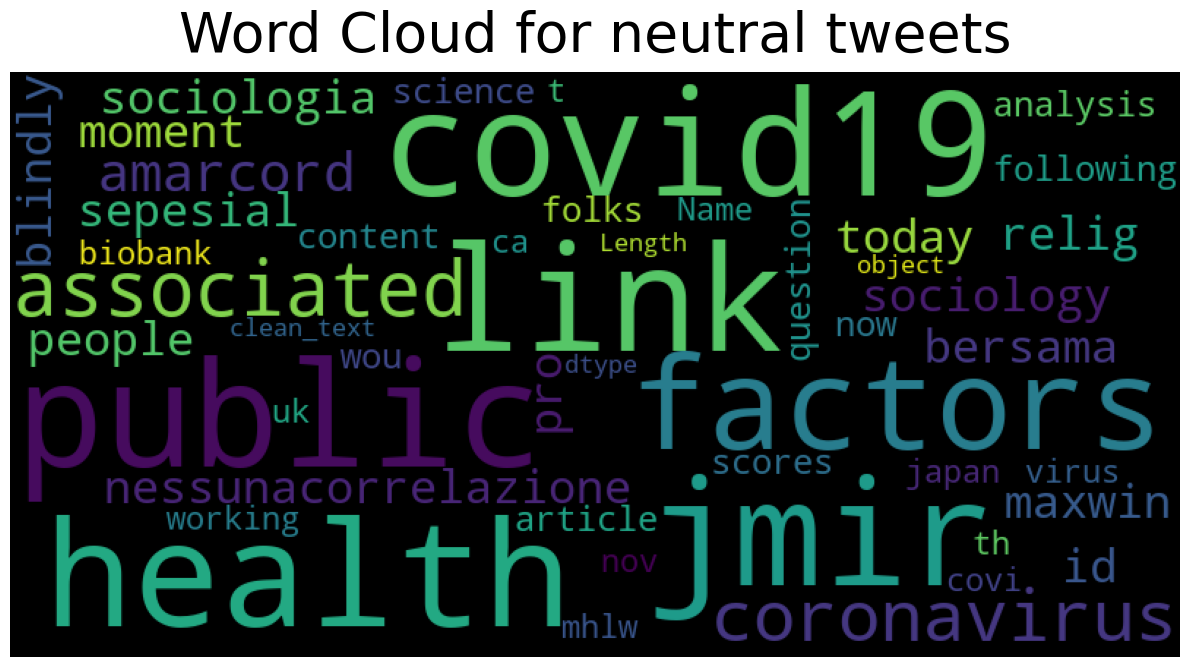

In [25]:
wordcloud.generate(str(df_neutral['clean_text']))
plt.figure(figsize=(12.0,8.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud for neutral tweets", fontdict={'size': 40, 'color': 'black', 'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()  

## Wordcloud for the negative dataset

In [26]:
df_negative['clean_text'] = df_negative['text'].apply(lambda x: remove_punctuation(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
stop_words = set(STOPWORDS)
wordcloud = WordCloud(background_color='black', stopwords = stop_words,max_words = 500, max_font_size = 100, random_state = 42, width=800, height=400)

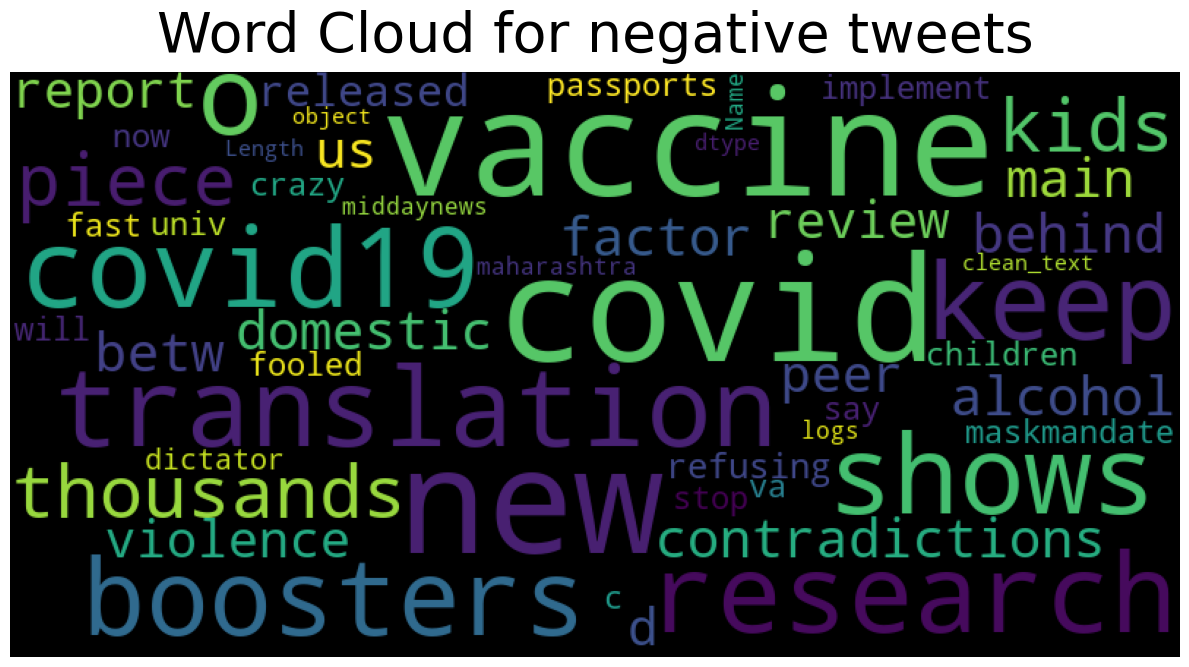

In [28]:
wordcloud.generate(str(df_negative['clean_text']))
plt.figure(figsize=(12.0,8.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud for negative tweets", fontdict={'size': 40, 'color': 'black', 'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()  

## Tokenization

In [29]:
df["text_len"] = df["text"].astype(str).apply(len)
df["text_word_count"] = df["text"].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(df.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,110.89
neutral,102.00
positive,110.50


In [30]:
round(pd.DataFrame(df.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,17.93
neutral,15.48
positive,17.60


In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
#Removing Punctuation
def remove_punct(text):
  text = "".join([char for char in text if char not in string.punctuation])
  text = re.sub("[0–9]+", "", text)
  return text
  
df["punct"] = df["text"].apply(lambda x: remove_punct(x))#Appliyng tokenization

def tokenization(text):
    text = re.split('\W+', text)
    return text
    

df['tokenized'] = df['punct'].apply(lambda x: tokenization(x.lower()))#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')


def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['nonstop'] = df['tokenized'].apply(lambda x: remove_stopwords(x))#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
    
df['stemmed'] = df['nonstop'].apply(lambda x: stemming(x))#Cleaning Text


def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
    
df.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,clean_text,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,Translation; Research shows #COVID19 vaccine o...,translation research shows covid19 vaccine o...,-0.029167,0.200000,negative,NaN,NaN,NaN,NaN,translation research shows covid19 vaccine o...,118,16,translation research shows covid1 vaccine of...,"[translation, research, shows, covid1, vaccine...","[translation, research, shows, covid1, vaccine...","[translat, research, show, covid1, vaccin, off..."
1,Amarcord... #COVID19 #nessunacorrelazione http...,amarcord covid19 nessunacorrelazione,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0,amarcord covid19 nessunacorrelazione,43,3,amarcord covid1 nessunacorrelazione,"[amarcord, covid1, nessunacorrelazione, ]","[amarcord, covid1, nessunacorrelazione, ]","[amarcord, covid1, nessunacorrelazion, ]"
2,Today…15–11-2022 #sociologia #sociology #relig...,today 15 11 2022 sociologia sociology relig...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0,today 15 11 2022 sociologia sociology relig...,60,8,today 15 11 222 sociologia sociology religi...,"[today, 15, 11, 222, sociologia, sociology, re...","[today, 15, 11, 222, sociologia, sociology, re...","[today, 15, 11, 222, sociologia, sociolog, rel..."
3,Covid-19 boosters could keep thousands of kids...,covid 19 boosters could keep thousands of kids...,0.000000,0.300000,negative,NaN,NaN,NaN,NaN,covid 19 boosters could keep thousands of kids...,110,17,covid 1 boosters could keep thousands of kids ...,"[covid, 1, boosters, could, keep, thousands, o...","[covid, 1, boosters, could, keep, thousands, k...","[covid, 1, booster, could, keep, thousand, kid..."
4,RT @picardonhealth: Isn't protecting our child...,isn t protecting our children a good reason t...,0.475000,0.466667,positive,NaN,NaN,NaN,NaN,isn t protecting our children a good reason t...,120,22,isn t protecting our children a good reason t...,"[, isn, t, protecting, our, children, a, good,...","[, protecting, children, good, reason, wear, m...","[, protect, children, good, reason, wear, mask..."
